# Hacktiv8 Introduction to Python for Data Science - Project Assignment 1

Nama : Andrena Dhiffa Salsabila


Kode Peserta : PYTN-KS20-02

Kelas : PYTN-KS-20

Sumber : https://www.kaggle.com/datasets/jboysen/london-crime

## Project Overview

The dataset used in this project is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains :

- lsoa_code : this represents a policing area
- borough : the london borough for which the statistic is related
- major_category : the major crime category
- minor_category : the minor crime category
- value : the count of the crime for that particular borough, in that particular month
- year : the year of the summary statistic
- month : the month of the summary statistic

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import folium


## Read Dataset

Membaca file berbentuk CSV yang didefinisikan dengan data_london

In [2]:
data_london = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
data_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


## Data 

Membuat salinan dengan mendifinisikan sebagai df agar data asli tidak rusak

In [4]:
df = data_london.copy()

Melalukan cek jika terdapat null value pada dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
df.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [7]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Membuat kolom baru bernama date dengan menggabungkan kolom month dan year, diubah menjadi datetime

In [8]:
date = []
for i,j in zip(df["year"],df["month"]):
    date.append(f"{i} {j}")
df["date"] = date
df["date"] = pd.to_datetime(df["date"])
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5036\1122694943.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


,lsoa_code,borough,major_category,minor_category,value,year,month,date
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11-01
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11-01
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05-01
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03-01
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06-01


Mengurutkan data berdasarkan kolom date, membuang kolom yang tidak diperlukan, dan mengubah kolom date menjadi index

In [9]:
df = df.sort_values("date")
df = df.drop(["year","month"],axis=1)
df = df.set_index("date")
df.head()

,lsoa_code,borough,major_category,minor_category,value
date,,,,,
2008-01-01,E01000013,Barking and Dagenham,Burglary,Burglary in Other Buildings,3
2008-01-01,E01003775,Redbridge,Criminal Damage,Criminal Damage To Dwelling,0
2008-01-01,E01000274,Barnet,Drugs,Drug Trafficking,0
2008-01-01,E01001870,Hammersmith and Fulham,Violence Against the Person,Common Assault,0
2008-01-01,E01000006,Barking and Dagenham,Sexual Offences,Other Sexual,0


## Line Plot

### Pada tahun berapa terjadi jumlah kejahatan tertinggi dan terendah?

membuat dataframe baru yaitu crime_per_year berisi jumlah kejahatan per tahun


In [10]:
crime_per_year = df.resample("Y")[["value"]].sum()
crime_per_year

,value
date,
2008-12-31,738641
2009-12-31,717214
2010-12-31,715324
2011-12-31,724915
2012-12-31,737329
2013-12-31,686407
2014-12-31,680183
2015-12-31,711624
2016-12-31,736121


Memvisualisasikan jumlah kejahatan per tahun dengan menggunakan matplotlib

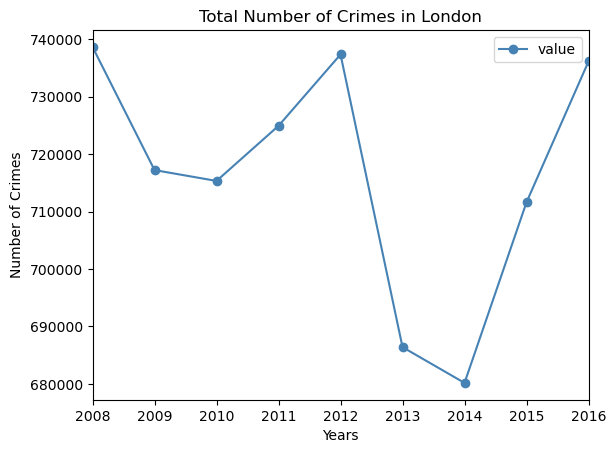

In [11]:
crime_per_year.plot(kind="line", marker='o', color="steelblue")

plt.title("Total Number of Crimes in London")
plt.ylabel("Number of Crimes")
plt.xlabel("Years")

plt.show()

Memvisualisasikan jumlah kejahatan per tahun dengan menggunakan plotly

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=crime_per_year.index.year,
                         y=crime_per_year.value,
                         mode="lines+markers",
                         line=dict(color="steelblue")))
fig.update_layout(title="Total Number of Crimes by Year",
                  xaxis_title="Year",
                  yaxis_title="Number of Crimes")
fig.show()

**Kesimpulan** : Berdasarkan grafik line plot, disimpulkan bahwa jumlah kejahatan tertinggi terjadi pada tahun 2008 yaitu 783.641 dan jumlah kejahatan terendah terjadi pada tahun 2014 yaitu 680.183.

## Bar Plot

### Manakah wilayah yang memiliki total kejahatan tertinggi di London tahun 2008-2016?

Membuat dataframe baru yaitu sum_crime

In [13]:
sum_crime = df.drop(["lsoa_code", "major_category", "minor_category"], axis=1).groupby("borough").sum()
sum_crime = sum_crime.sort_values(by="value", ascending=True)
sum_crime

,value
borough,
City of London,780
Kingston upon Thames,89306
Richmond upon Thames,96771
Sutton,100987
Bexley,114136
Merton,115654
Harrow,116848
Havering,138947
Barking and Dagenham,149447


Memvisualisasikan total kejahatan setiap wilayah di London

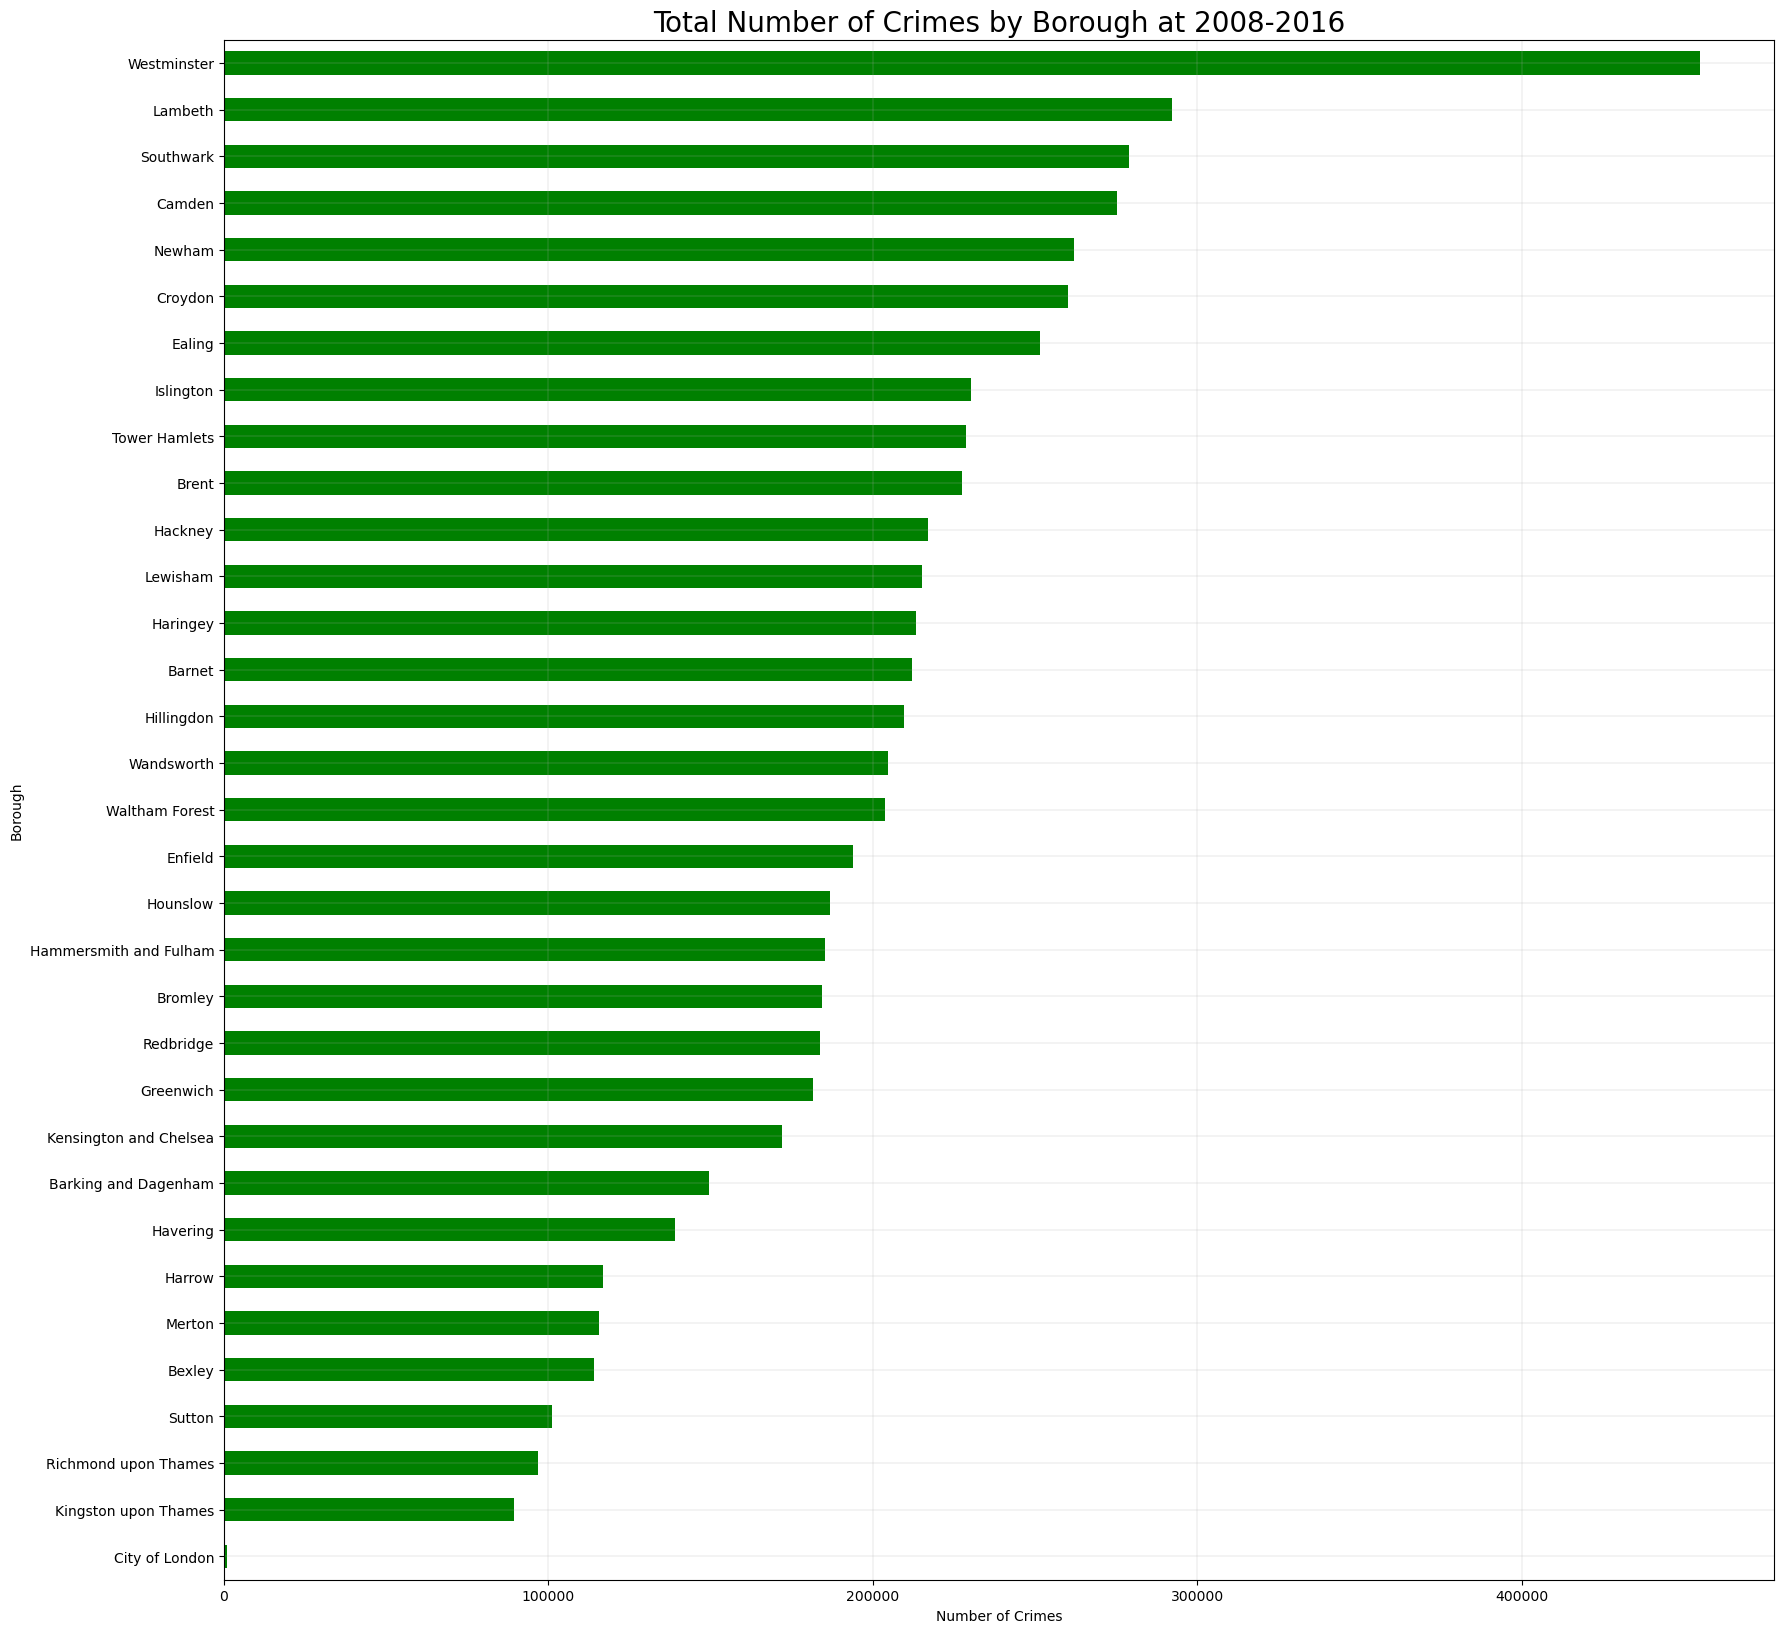

In [14]:
sum_crime.plot(kind='barh', figsize=(20,20), legend = False, color = "green")

plt.xlabel("Number of Crimes")
plt.ylabel("Borough")
plt.grid(linewidth=0.2)
plt.title("Total Number of Crimes by Borough at 2008-2016", fontsize = 20)

plt.show()

**Kesimpulan** : Berdasarkan bar chart di atas, dapat disimpulkan bahwa wilayah yang memiliki jumlah kejahatan tertinggi pada tahun 2008-2016 yaitu Westminster sebesar 455028.

## Pie Chart

### Seberapa besar proporsi kejahatan yang terjadi pada tahun dengan jumlah kejahatan tertinggi?

Karena jumlah kejahatan tertinggi terjadi pada tahun 2008, maka akan diselidiki proporsi kejahatan yang terjadi antara tahun 2008 sampai 2016

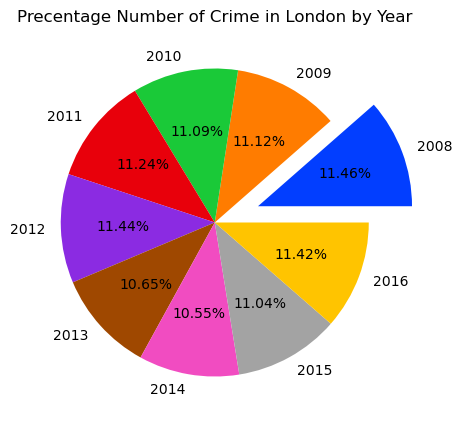

In [15]:
labels = df.resample("Y")[["value"]].sum().index.year
values = df.resample("Y")[["value"]].sum().value
colors = sns.color_palette("bright")[:len(df.resample("Y")[["value"]].sum())]
# jarak antar data 
explode = [0.3,0,0,0,0,0,0,0,0]

plt.figure(figsize=(5,5))
plt.title("Precentage Number of Crime in London by Year")
plt.pie(values, labels = labels, autopct = "%1.2f%%", colors=colors, explode=explode)
plt.show() 


**Kesimpulan** : Berdasarkan output pie chart di atas, dapat disimpulkan bahwa proporsi kejahatan tertinggi yaitu 11,46% pada tahun 2008.

## Area Plot

### Sebutkan 5 Kota di London yang memiliki jumlah kejahatan paling besar antara tahun 2008-2016!

Menjumlahkan seluruh kejahatan berdasarkan wilayah dan diurutkan dari yang tertinggi

In [16]:
top_5_borough = df.groupby("borough")[["value"]].sum().sort_values("value",ascending=False).head().index
top_5_borough

Index(['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham'], dtype='object', name='borough')

Membuat dataset yang hanya berisi top 5 wilayah dengan jumlah kejahatan tertinggi

In [17]:
top_5_crime = df[df["borough"].isin(top_5_borough)][["borough","value"]]
top_5_crime = top_5_crime.groupby(["borough",top_5_crime.index.year])[["value"]].sum()
top_5_crime = top_5_crime.reset_index()
top_5_crime

,borough,date,value
0,Camden,2008,32010
1,Camden,2009,31612
2,Camden,2010,31804
3,Camden,2011,33956
4,Camden,2012,31472
5,Camden,2013,28435
6,Camden,2014,27198
7,Camden,2015,29477
8,Camden,2016,29183
9,Lambeth,2008,31717


memvisualisasikan top 5 wilayah dengan kejahatan tertinggi menggunakan area plot

In [18]:
fig = px.area(top_5_crime, x="date", y="value", color="borough", 
              title = "Top 5 Most Crimes Boroughs in London")
fig.update_layout(title_x = 0.5, legend=dict(title="Boroughs"))
fig.show()

**Kesimpulan** : Berdasarkan hasil output area chart di atas, dapat diambil kesimpulan bahwa 5 wilayah dengan jumlah kejahatan tetinggi berdasarkan kategori utama adalah Westminster, Southwark, Newham, Lambeth, dan Camden.

## Scatter Plot

### Bagaimanakah persebaran data total kejahatan per bulannya pada tahun 2008-2016?

In [19]:
value_per_month = df.groupby('date')[["value"]].sum()
value_per_month = value_per_month.reset_index()
value_per_month

,date,value
0,2008-01-01,65419
1,2008-02-01,62626
2,2008-03-01,61343
3,2008-04-01,59640
4,2008-05-01,62587
...,...,...
103,2016-08-01,62666
104,2016-09-01,61412
105,2016-10-01,63405
106,2016-11-01,61064


Menampilkan persebaran data total kejahatan per bulannya pada tahun 2008-2016 menggunakan scatterplot

In [20]:
fig = px.scatter(value_per_month, x="date", y="value", trendline="ols")
fig.update_layout(title="Scatter Plot", title_x=0.5)
fig.show()

c:\Users\Lenovo\Latihan pertemuan 1\env\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\Lenovo\Latihan pertemuan 1\env\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



**Kesimpulan** : Dari R^2 garis regresi ols pada scatterplot dapat dilihat R^2 nya lebih mendekati 0 daripada 1 sehingga besar pengaruh variabel independen terhadap variabel dependen kecil. Selain itu, dapat dilihat sebaran scatterplot cenderung menyebar secara acak dan tidak membentuk pola.

## Histogram dan Box-Plot

### Buatlah persebaran jumlah kejahatan yang terjadi pada wilayah Southwark!

Membuat dataframe baru yaitu Southwark untuk mengetahui jumlah kejahatan yang berada pada wilayah Southwark

In [21]:
Southwark = df.loc[df['borough']=='Southwark'][['value']].resample('M').sum()
Southwark.head()

,value
date,
2008-01-31,2990
2008-02-29,2875
2008-03-31,2703
2008-04-30,2713
2008-05-31,2867


In [22]:
fig = go.Figure()
fig = px.histogram(Southwark, x="value", barmode="stack", marginal="box")
fig.update_layout(title="Number of Crimes in Southwark by Month",
                  title_x=0.5,
                  xaxis_title="Crimes",
                  yaxis_title="Count")
fig.show()

**Kesimpulan**: Dari boxplot bisa dilihat statistik deskriptifnya seperti min = 2068 dan max = 3116 dan median = 2583, serta quantilnya. Dan dapat dilihat terdapat satu outliers (pencilan). Untuk histogram dapat dilihat datanya cenderung simetris.

## Word Clouds

### Apa saja kata yang paling sering muncul pada kejahatan dengan kategori minor pada tahun 2009?

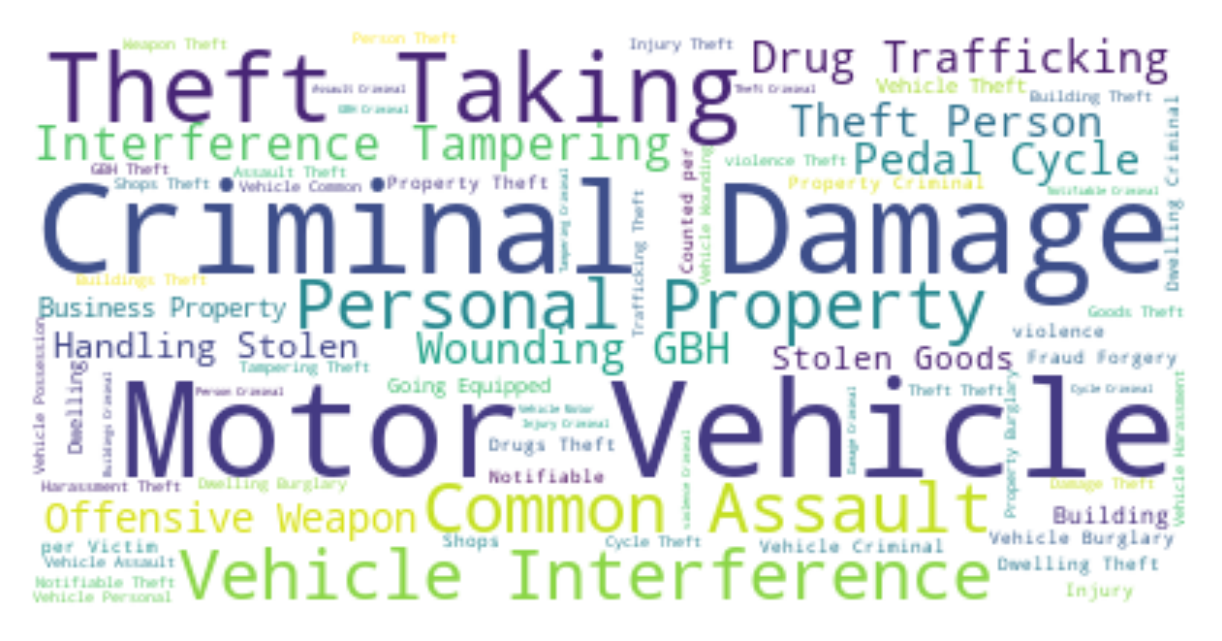

In [23]:
stopwords = set(STOPWORDS)

plt.figure(figsize=(5,5),dpi=300)
crimes_wordcloud = WordCloud(background_color="white",
                             stopwords=stopwords).generate(" ".join(df.loc["2009"]["minor_category"]))

plt.imshow(crimes_wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

**Kesimpulan** : Berdasarkan word clouds di atas, dapat disimpulkan kata yang paling sering muncul pada kejahatan dengan kategori minor pada tahun 2009 adalah Motor Vehicle, Criminal Damage, dan Theft Taking

## Folium

### Bagaimana cara melihat wilayah dengan kategori kejahatan tertinggi di London?

In [24]:
london_map = folium.Map(location=[51.507351, -0.127758], zoom_start=10)
london_map

In [25]:
df_london = df[['borough','value']]
london_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 

In [26]:
london = folium.Map(location=[51.507351, -0.127758], zoom_start=10)
folium.Choropleth(
    geo_data=london_geo,
    data=df_london,
    columns=["borough", "value"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="Crime rate in boroughs of London",
    highlight=True,
).add_to(london)

london

**Kesimpulan**: Berdasarkan output folium di atas, dapat di ambil kesimpulan bahwa wilayah yang warnanya merah tersebut merupakan wilayah dengan jumlah kejahatan tertinggi.

In [29]:
df_folium = df[['borough','value']]

In [30]:

world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson'
world_map=folium.Map(location=[54.237933,-2.36967],zoom_start=5,tiles = "Stamen Terrain")

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df_folium,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)
display(world_map)

c:\Users\Lenovo\Latihan pertemuan 1\env\Lib\site-packages\folium\folium.py:465: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.

